In [2]:
# for loading data
import requests
import gzip
import shutil
from io import BytesIO
import pandas as pd

# for getting directories of downloaded files
import os

# Sentiment
from textblob import TextBlob
import nltk # natural language toolkit
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline # Hugging Face
import fasttext



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
current_directory = os.getcwd()

vader_lexicon_path = current_directory+"/vader_lexicon/vader_lexicon.txt"

In [5]:
# import fasttext.util
# fasttext.util.download_model('en', if_exists='ignore')  # English
# ft = fasttext.load_model('cc.en.300.bin')

# Load Data

In [4]:
# URL of the compressed CSV file
url = "http://data.insideairbnb.com/united-states/dc/washington-dc/2023-12-18/data/reviews.csv.gz"

# Download the compressed file
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the content from the response
    compressed_data = BytesIO(response.content)

    # Decompress the gzip file
    with gzip.open(compressed_data, 'rb') as f_in:
        # Load the decompressed data into a DataFrame
        reviews = pd.read_csv(f_in)

        # Display basic information about the DataFrame
        print(reviews.info())

        # You can now use the 'reviews' DataFrame for further analysis or processing
else:
    print(f"Failed to download. Status code: {response.status_code}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382008 entries, 0 to 382007
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     382008 non-null  int64 
 1   id             382008 non-null  int64 
 2   date           382008 non-null  object
 3   reviewer_id    382008 non-null  int64 
 4   reviewer_name  382007 non-null  object
 5   comments       381905 non-null  object
dtypes: int64(3), object(3)
memory usage: 17.5+ MB
None


In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3686,131293,2010-11-01,257234,Callie,Staying with Levita and her wonderful family w...
1,67483,178804,2011-02-06,74805,Nathan,We had a wonderful stay! It's a beautiful hous...
2,67483,186099,2011-02-21,41558,Rajeev,Looks like my last review didn't get posted. \...
3,67483,215731,2011-04-03,368549,Sarah-Marie,I visited DC with my boyfriend from Germany. C...
4,67483,255742,2011-05-08,530299,Marci,The upstairs apartment was charming and comfor...


In [6]:
reviews.shape

(382008, 6)

In [7]:
url = "http://data.insideairbnb.com/united-states/dc/washington-dc/2023-12-18/data/listings.csv.gz"

response = requests.get(url)

if response.status_code == 200:
    compressed_data = BytesIO(response.content)
    with gzip.open(compressed_data, 'rb') as f_in:
        listings = pd.read_csv(f_in)
        print(listings.info())
else:
    print(f"Failed to download. Status code: {response.status_code}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6853 entries, 0 to 6852
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6853 non-null   int64  
 1   listing_url                                   6853 non-null   object 
 2   scrape_id                                     6853 non-null   int64  
 3   last_scraped                                  6853 non-null   object 
 4   source                                        6853 non-null   object 
 5   name                                          6853 non-null   object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         4841 non-null   object 
 8   picture_url                                   6853 non-null   object 
 9   host_id                                       6853 non-null   i

In [8]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20231218032619,2023-12-18,city scrape,Home in Washington · ★4.64 · 1 bedroom · 1 bed...,NaN,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,...,4.84,3.91,4.64,NaN,f,1,0,1,0,0.53
1,3943,https://www.airbnb.com/rooms/3943,20231218032619,2023-12-18,city scrape,Townhouse in Washington · ★4.83 · 1 bedroom · ...,NaN,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/airflow/Hosti...,5059,...,4.91,4.57,4.75,Hosted License: 5007242201001033,f,5,0,5,0,2.78
2,4197,https://www.airbnb.com/rooms/4197,20231218032619,2023-12-18,city scrape,Home in Washington · ★4.85 · 1 bedroom · 1 bed...,NaN,"Our area, the Eastern Market neighborhood of C...",https://a0.muscache.com/pictures/miso/Hosting-...,5061,...,4.98,4.96,4.95,Hosted License: 5007242201000749,f,2,0,2,0,0.33
3,4529,https://www.airbnb.com/rooms/4529,20231218032619,2023-12-18,city scrape,Home in Washington · ★4.66 · 1 bedroom · 1 bed...,NaN,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,...,4.93,4.51,4.83,Exempt,f,2,0,2,0,0.58
4,4967,https://www.airbnb.com/rooms/4967,20231218032619,2023-12-18,previous scrape,Home in Washington · ★4.74 · 1 bedroom · 1 bed...,NaN,NaN,https://a0.muscache.com/pictures/2439810/bb320...,7086,...,4.93,4.21,4.64,NaN,f,3,0,3,0,0.19


In [9]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [10]:
for col in listings.columns:
    print(col)

id
listing_url
scrape_id
last_scraped
source
name
description
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
latitude
longitude
property_type
room_type
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
re

In [11]:
listings.shape

(6853, 75)

# Get Sentiment

In [12]:
# TextBlob
def analyze_sentiment(comment):
    try:
        # Check if the comment is not None and is a string
        if comment is not None and isinstance(comment, str):
            blob = TextBlob(comment)
            polarity = blob.sentiment.polarity
            if polarity > 0:
                return "Positive"
            elif polarity < 0:
                return "Negative"
            else:
                return "Neutral"
        else:
            return "Unknown"
    except TypeError as e:
        print(f"Error analyzing sentiment: {e}")
        return "Error"

# Apply sentiment analysis to create a new column
reviews['sentiment_textblob'] = reviews['comments'].apply(analyze_sentiment)


In [13]:
# natural language toolkit
sia = SentimentIntensityAnalyzer(lexicon_file=vader_lexicon_path)

# Function to analyze sentiment and return mood
def analyze_sentiment_sia(comment):
    try:
        # Check if the comment is not None and is a string
        if comment is not None and isinstance(comment, str):
            # Get compound score from SentimentIntensityAnalyzer
            compound_score = sia.polarity_scores(comment)['compound']
            
            if compound_score >= 0.05:
                return "Positive"
            elif compound_score <= -0.05:
                return "Negative"
            else:
                return "Neutral"
        else:
            return "Unknown"
    except TypeError as e:
        print(f"Error analyzing sentiment: {e}")
        return "Error"

# Apply sentiment analysis to create a new column
reviews['sentiment_sia'] = reviews['comments'].apply(analyze_sentiment_sia)


In [ ]:
#Hugging Face Transformers

# Instantiate the sentiment analyzer from Hugging Face Transformers
sentiment_analyzer = pipeline("sentiment-analysis")

# Function to analyze sentiment and return mood
def analyze_sentiment_transformers(comment):
    try:
        # Check if the comment is not None and is a string
        if comment is not None and isinstance(comment, str):
            # Get sentiment score from Hugging Face Transformers
            result = sentiment_analyzer(comment)[0]
            label = result['label']

            if label == 'POSITIVE':
                return "Positive"
            elif label == 'NEGATIVE':
                return "Negative"
            else:
                return "Neutral"
        else:
            return "Unknown"
    except Exception as e:
        print(f"Error analyzing sentiment: {e}")
        return "Error"

# Apply sentiment analysis to create a new column
reviews['sentiment_transformers'] = reviews['comments'].apply(analyze_sentiment_transformers)


In [ ]:
# # Load the pre-trained FastText model (download from https://fasttext.cc/docs/en/crawl-vectors.html)
# fasttext_model_path = current_directory+'/path/to/your/fasttext_model.bin'
# ft = fasttext.load_model(fasttext_model_path)

# # Function to analyze sentiment and return mood
# def analyze_sentiment_fasttext(comment):
#     try:
#         # Check if the comment is not None and is a string
#         if comment is not None and isinstance(comment, str):
#             # Get sentiment score from FastText
#             result = ft.predict(comment)
#             label = result[0][0]

#             if label == '__label__positive':
#                 return "Positive"
#             elif label == '__label__negative':
#                 return "Negative"
#             else:
#                 return "Neutral"
#         else:
#             return "Unknown"
#     except Exception as e:
#         print(f"Error analyzing sentiment: {e}")
#         return "Error"

# # Apply sentiment analysis to create a new column
# reviews['sentiment_fasttext'] = reviews['comments'].apply(analyze_sentiment_fasttext)

In [15]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment_textblob,sentiment_sia
0,3686,131293,2010-11-01,257234,Callie,Staying with Levita and her wonderful family w...,Positive,Positive
1,67483,178804,2011-02-06,74805,Nathan,We had a wonderful stay! It's a beautiful hous...,Positive,Positive
2,67483,186099,2011-02-21,41558,Rajeev,Looks like my last review didn't get posted. \...,Positive,Positive
3,67483,215731,2011-04-03,368549,Sarah-Marie,I visited DC with my boyfriend from Germany. C...,Positive,Positive
4,67483,255742,2011-05-08,530299,Marci,The upstairs apartment was charming and comfor...,Positive,Positive


# Explore Sentiment

In [16]:
reviews.groupby(['sentiment_textblob', 'sentiment_sia']).size().reset_index(name='count')

,sentiment_textblob,sentiment_sia,count
0,Negative,Negative,2001
1,Negative,Neutral,672
2,Negative,Positive,1508
3,Neutral,Negative,2535
4,Neutral,Neutral,10307
5,Neutral,Positive,2416
6,Positive,Negative,3760
7,Positive,Neutral,2451
8,Positive,Positive,356255
9,Unknown,Unknown,103


Get rid of "unknown"

In [18]:
reviews_v2 = reviews[reviews['sentiment_textblob'] != "Unknown"]

In [19]:
counts = reviews_v2.groupby(['sentiment_textblob', 'sentiment_sia']).size().reset_index(name='count')

# Calculate the total count for each group
total_counts = counts['count'].sum()

# Add a column for percentage
counts['percentage'] = (counts['count'] / total_counts) * 100

counts

,sentiment_textblob,sentiment_sia,count,percentage
0,Negative,Negative,2001,0.523952
1,Negative,Neutral,672,0.175960
2,Negative,Positive,1508,0.394863
3,Neutral,Negative,2535,0.663778
4,Neutral,Neutral,10307,2.698839
5,Neutral,Positive,2416,0.632618
6,Positive,Negative,3760,0.984538
7,Positive,Neutral,2451,0.641783
8,Positive,Positive,356255,93.283670


The good news is that they mostly agree

In [25]:
counts = reviews_v2
counts['sentiments_match'] = counts['sentiment_textblob'] == counts['sentiment_sia']
counts = counts.groupby(['sentiments_match']).size().reset_index(name='count')

# Calculate the total count for each group
total_counts = counts['count'].sum()

# Add a column for percentage
counts['percentage'] = (counts['count'] / total_counts) * 100

counts

/var/folders/_n/rrgq9bp931j_96jz07qrpmfw0000gn/T/ipykernel_590/553754313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['sentiments_match'] = counts['sentiment_textblob'] == counts['sentiment_sia']


,sentiments_match,count,percentage
0,False,13342,3.493539
1,True,368563,96.506461


let's examine cases where they do not

In [27]:
mismatched_reviews = reviews_v2[reviews_v2['sentiment_textblob'] != reviews_v2['sentiment_sia']]

pd.set_option('display.max_colwidth', None)

mismatched_reviews[['comments', 'sentiment_textblob', 'sentiment_sia']].head()

,comments,sentiment_textblob,sentiment_sia
54,"We had a pleasant stay and were satisfied with the quality of the accommodations as presented on airbnb. While the plumbing issue was inconvenient, we benefitted by the more sumptuous bathroom on the second floor. Though no fault of the landlord, the constant noise of the street traffic driving over the loose steel plate on 13th Street was the only negative of our stay at Fig and Holly. When the road work is complete, future guests will be able to have a better night's sleep.",Positive,Negative
97,"I love Vita's hideaway. If you are a musician auditioning for any band in DC on Barracks Row this BNB is a 6 minute drive away or a 15 minute ride on the bus ($1.80 per ride in cash). Don't stay in an expensive bad hotel, come stay at Vita's.",Negative,Positive
121,"The house, The Fig and Holly, did not look like its photo. Nor did it look like its representation on Google Earth. During our stay, the yard (front, back, side) was extremely overgrown. The front porch and walkway had not been swept in quite some time. The branches of the iconic fig tree hung low over the front walkway. They were a hazard during the day, but even more of a hazard at night when there were no groundlights to light the way and no light on the porch (unless the guest had the foresight to turn it on before leaving in the morning).\r<br/>In short, the exterior of the property has been neglected and I was embarrassed to have friends come and pick us up there.\r<br/>\r<br/>The bed linens were stained and uninviting. One of the towels was also stained. Going up and down a flight of stairs to adjust the thermostat was inconvenient.\r<br/>\r<br/>Yes, the bed was comfortable. There was tea, coffee, bread, jam, & cereal as promised.\r<br/>",Positive,Negative
188,"A good choice for someone who wants to be close to the city center and who doesn't have a car. The Subway (green line) is at a walkable distance and there is also buses stoping near the house. The neighborhood is not well maintained (maybe avoid if you're not use to travel of if you prefer fancy neighborhood) but it's a pity because it has a lot of potential and has a nice history (don't miss the great visit of Frederick Douglass House!!). People may tell you that Anacostia is dangerous but I never felt unsafe there. The only bad thing about this airbnb is that the kitchen was not clean enough for me, clean in appearance but not in detail.",Positive,Negative
220,"Wir (eine Erwachsene und zwei Teenager) hatten einen gelungenen Aufenthalt in Washington DC, was auch der Gastfreundschaft von Jane und Max zu verdanken war! Die Location in Georgetown ist wunderschön gelegen, mit Bus und Fahrrad die Stadt super zu erreichen. Jane und Max haben uns mit tollen Infos versorgt, die uns geholfen haben, uns in Washington DC sofort soetwas wie heimisch zu fühlen. Besonders genossen haben wir den Austausch mit unseren Gastgebern beim gemeinsame Frühstück und den wirklich bezaubernden Mops Bella!!! Dies wasr unsere erste Erfahrung mit airbnb und wir befürchten, diese wird schwer zu toppen sein!",Positive,Negative


# Predicting `sentiment_sia` using listing data

## Prep data

In [28]:
reviews_v2.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment_textblob,sentiment_sia,sentiments_match
0,3686,131293,2010-11-01,257234,Callie,"Staying with Levita and her wonderful family was an amazing experience. They were so welcoming to me and her home was great. I cannot express enough how nice my experience was. Not only is Levita's home very close to the metro, extremely comfortable, but her vegan cooking was incredible as well. Anyone would be lucky to stay with such a friendly, welcoming family.",Positive,Positive,True
1,67483,178804,2011-02-06,74805,Nathan,"We had a wonderful stay! It's a beautiful house in a quiet neighborhood (columbia heights)that's a short walk from the metro, wonderland ballroom, etc. Chris is a great host. He's very friendly and accommodating. It's a great value and we'd stay again. Slept 5 comfortably.",Positive,Positive,True
2,67483,186099,2011-02-21,41558,Rajeev,"Looks like my last review didn't get posted. \r<br/>We had a very pleasant stay in this Victorian rustic place, Even though its not a completely separate unit we had complete privacy as had complete attic to ourselves. Short drive to every thing DC and easy street parking right outside made it easy to come back even during the day.",Positive,Positive,True
3,67483,215731,2011-04-03,368549,Sarah-Marie,"I visited DC with my boyfriend from Germany. Chris was very welcoming, when we arrived. The appartment was cozy and clean; we really enjoyed staying there. We also appreciate the ""green"" styl of living.\r<br/>The next metro station took us conveniently to Downtown DC. There is also a Giant and a shopping Center close to the appartment. \r<br/>We also had our privacy and contacted Chris about breakfast items we needed by texting or leaving notes (that's why our stay was not very personal).\r<br/>All in all we really enjoyed staying there!",Positive,Positive,True
4,67483,255742,2011-05-08,530299,Marci,"The upstairs apartment was charming and comfortable, with lots of little ""extras,"" including fruit and and breakfast foods. Short walk to the Col Hts metro. A great experience; I would definitely stay here again.",Positive,Positive,True


In [30]:
# Function to generate sentiment score
def sia_sentiment_score(comment):
    try:
        # Check if the comment is not None and is a string
        if comment is not None and isinstance(comment, str):
            # Get compound score from SentimentIntensityAnalyzer
            compound_score = sia.polarity_scores(comment)['compound']
            return compound_score
    except TypeError as e:
        print(f"Error analyzing sentiment: {e}")
        return "Error"

# Apply sentiment analysis to create a new column
reviews_v2['sentiment_score'] = reviews_v2['comments'].apply(sia_sentiment_score)


/var/folders/_n/rrgq9bp931j_96jz07qrpmfw0000gn/T/ipykernel_590/4266165957.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_v2['sentiment_score'] = reviews_v2['comments'].apply(sia_sentiment_score)


In [34]:
reviews_v2.shape

(381905, 10)

In [35]:
listings.shape

(6853, 75)

In [42]:
combined = reviews_v2.merge(listings, how="left", left_on="listing_id", right_on="id")
print("reviews_v2 shape:", reviews_v2.shape)
print("listings shape:", listings.shape)
print("combined shape:", combined.shape)

reviews_v2 shape: (381905, 10)
listings shape: (6853, 75)
combined shape: (381905, 85)


In [52]:
for col in combined.columns:
    print(f"{col}: {combined[col].dtype}")

listing_id: int64
id_x: int64
date: object
reviewer_id: int64
reviewer_name: object
comments: object
sentiment_textblob: object
sentiment_sia: object
sentiments_match: bool
sentiment_score: float64
id_y: int64
listing_url: object
scrape_id: int64
last_scraped: object
source: object
name: object
description: float64
neighborhood_overview: object
picture_url: object
host_id: int64
host_url: object
host_name: object
host_since: object
host_location: object
host_about: object
host_response_time: object
host_response_rate: object
host_acceptance_rate: object
host_is_superhost: object
host_thumbnail_url: object
host_picture_url: object
host_neighbourhood: object
host_listings_count: int64
host_total_listings_count: int64
host_verifications: object
host_has_profile_pic: object
host_identity_verified: object
neighbourhood: object
neighbourhood_cleansed: object
neighbourhood_group_cleansed: float64
latitude: float64
longitude: float64
property_type: object
room_type: object
accommodates: int64


In [69]:
for_analysis = combined.filter(regex='^(sentiment_score|price|accommodates|review_score|calculated_host_listings_count|reviews_per_month)')

# convert the dollars to floats
for_analysis['price'] = for_analysis['price'].apply(lambda x: float(x.replace('$', '').replace(',', '')) if isinstance(x, str) else x)

# dropping review_scores_rating because it's realistically close enough to sentiment_score
for_analysis = for_analysis.drop(columns=['review_scores_rating'])

for_analysis.head()

/var/folders/_n/rrgq9bp931j_96jz07qrpmfw0000gn/T/ipykernel_590/2880748991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_analysis['price'] = for_analysis['price'].apply(lambda x: float(x.replace('$', '').replace(',', '')) if isinstance(x, str) else x)


,sentiment_score,accommodates,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.9811,1,67.0,4.73,4.45,4.91,4.84,3.91,4.64,1,0,1,0,0.53
1,0.9771,3,99.0,4.70,4.49,4.71,4.75,4.61,4.54,1,1,0,0,1.03
2,0.8977,3,99.0,4.70,4.49,4.71,4.75,4.61,4.54,1,1,0,0,1.03
3,0.9439,3,99.0,4.70,4.49,4.71,4.75,4.61,4.54,1,1,0,0,1.03
4,0.9313,3,99.0,4.70,4.49,4.71,4.75,4.61,4.54,1,1,0,0,1.03


In [70]:
for_analysis.dtypes

sentiment_score                                 float64
accommodates                                      int64
price                                           float64
review_scores_accuracy                          float64
review_scores_cleanliness                       float64
review_scores_checkin                           float64
review_scores_communication                     float64
review_scores_location                          float64
review_scores_value                             float64
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
dtype: object

In [74]:
# Count of nulls per column
for_analysis.isnull().sum()

sentiment_score                                     0
accommodates                                        0
price                                           27873
review_scores_accuracy                              2
review_scores_cleanliness                           2
review_scores_checkin                               2
review_scores_communication                         2
review_scores_location                              2
review_scores_value                                 2
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                                   0
dtype: int64

In [75]:
# all of the columns with missing data are continuous, so let's impute the median value in for missing values
# Impute missing values with the median of each column
for column in for_analysis.columns:
    if for_analysis[column].isnull().any():  # Check if the column has missing values
        median_value = for_analysis[column].median()  # Calculate the median of the column
        for_analysis[column].fillna(median_value, inplace=True)  # Fill missing values with the median

## Explore Data

<Axes: >

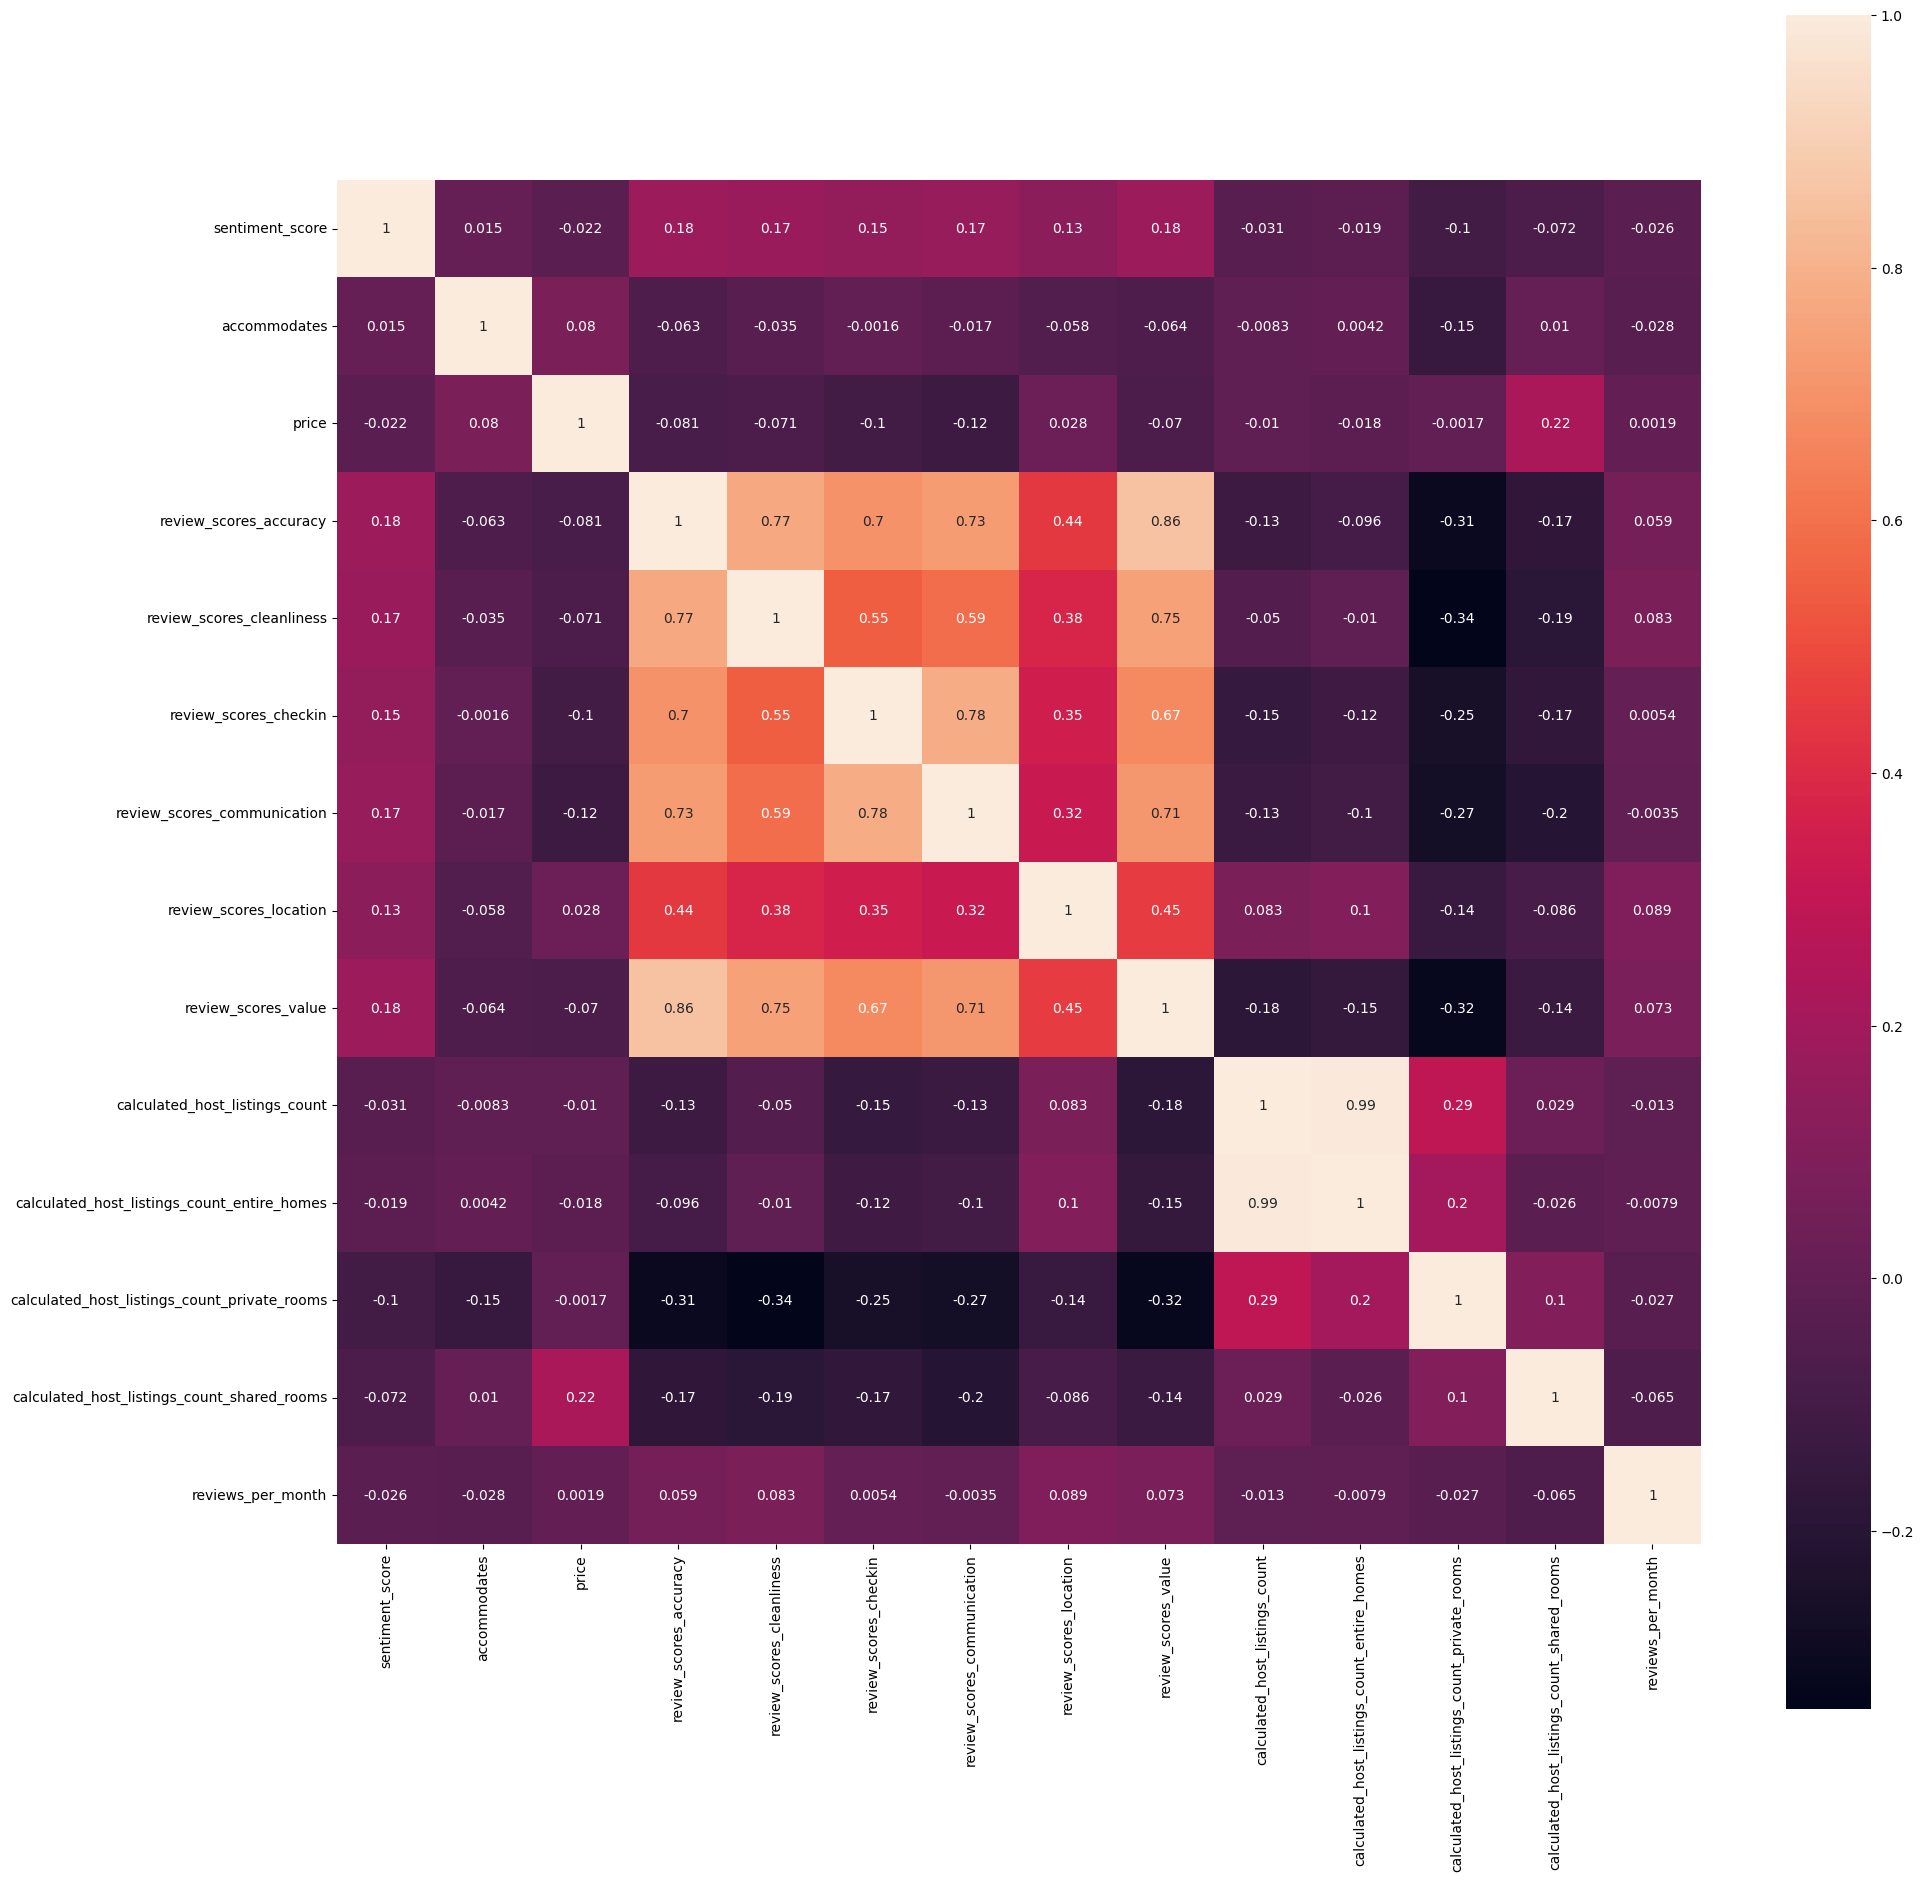

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_mat = for_analysis.corr()
plt.figure(figsize = (22,22))
sns.heatmap(corr_mat, annot = True, square = True)

In [78]:
corr_mat["sentiment_score"].sort_values(ascending=False)

sentiment_score                                 1.000000
review_scores_accuracy                          0.182226
review_scores_value                             0.182112
review_scores_cleanliness                       0.174835
review_scores_communication                     0.167022
review_scores_checkin                           0.154780
review_scores_location                          0.134278
accommodates                                    0.015021
calculated_host_listings_count_entire_homes    -0.018511
price                                          -0.022069
reviews_per_month                              -0.026002
calculated_host_listings_count                 -0.030786
calculated_host_listings_count_shared_rooms    -0.071840
calculated_host_listings_count_private_rooms   -0.104702
Name: sentiment_score, dtype: float64

In [79]:
from sklearn.ensemble import  RandomForestRegressor

# What are the most important variables per a random forest model?
X = for_analysis.loc[:, (for_analysis.columns != 'sentiment_score')]
Y = for_analysis["sentiment_score"]

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
random_forest.fit(X, Y)

# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print(f"Top most important features:")
print(feature_importance_df)

Top most important features:
                                         Feature  Importance
2                         review_scores_accuracy    0.281069
7                            review_scores_value    0.156095
12                             reviews_per_month    0.086831
1                                          price    0.086293
6                         review_scores_location    0.081781
3                      review_scores_cleanliness    0.079333
5                    review_scores_communication    0.078335
4                          review_scores_checkin    0.043850
10  calculated_host_listings_count_private_rooms    0.028112
8                 calculated_host_listings_count    0.026718
0                                   accommodates    0.022038
9    calculated_host_listings_count_entire_homes    0.019248
11   calculated_host_listings_count_shared_rooms    0.010296
